In [1]:
#initialise general libraries
import os
import numpy as np
import pandas as pd
from pandas import DataFrame
import pickle
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from matplotlib import pyplot as plt
%matplotlib inline

# Allows more columns to be shown for outputs
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5200)

In [2]:
#set directories
dirPData = "C:/Users/kevin/Google Drive/AML/Projects/Coursework/PData/"
dirPOutput = "C:/Users/kevin/Google Drive/AML/Projects/Coursework/POutput/"

In [3]:
#import variables
f_name = dirPData + 'ohprepVars.pickle'

with open(f_name, "rb") as f:
    dict_ = pickle.load(f)
    
df_test = dict_['df_test']
df_train = dict_['df_train']
OH_df_test = dict_['OH_df_test']
OH_df_train = dict_['OH_df_train']
del f_name, dict_

#prepare X and y
train_y = df_train['target'].values

var_notToUse = ['id']

allFeatures = [var for var in OH_df_train]

train_X = OH_df_train[allFeatures]
test_X = OH_df_test[allFeatures]

#prepare validation data
train_Xv, test_Xv, train_yv, test_yv = train_test_split(train_X, train_y, test_size=0.25, random_state=1)

# Random Forest Model
## Random Forest Classifier 
### Kaggle Score: 0.85145, Validation Score: 0.8740453033556482
<img src="randfor2.png">

In [4]:
rf_model1v = RandomForestClassifier(random_state=1, n_estimators=505)
rf_model1v.fit(train_Xv, train_yv)
rfprediction1v = rf_model1v.predict_proba(test_Xv)
print("Validation score:",roc_auc_score(test_yv, rfprediction1v[:,1]))

Validation score: 0.8740453033556482


In [5]:
rf_model2 = RandomForestClassifier(random_state=1, n_estimators=505)
rf_model2.fit(train_X, train_y)
rfprediction2 = rf_model2.predict_proba(test_X)

In [6]:
rfpred2 = {'id': df_test['id'].values,
        'target': rfprediction2[:,1]}
df_rfpred2 = DataFrame(rfpred2)

df_rfpred2 = df_rfpred2.reset_index().set_index('id')
df_rfpred2 = df_rfpred2.drop(columns='index')
df_rfpred2.head()

,target
id,
5,0.063366
10,0.130693
11,0.091089
13,0.225743
16,0.005941


In [7]:
df_rfpred2.to_csv(r'C:/Users/kevin/Google Drive/AML/Projects/Coursework/POutput/randfor2.csv')

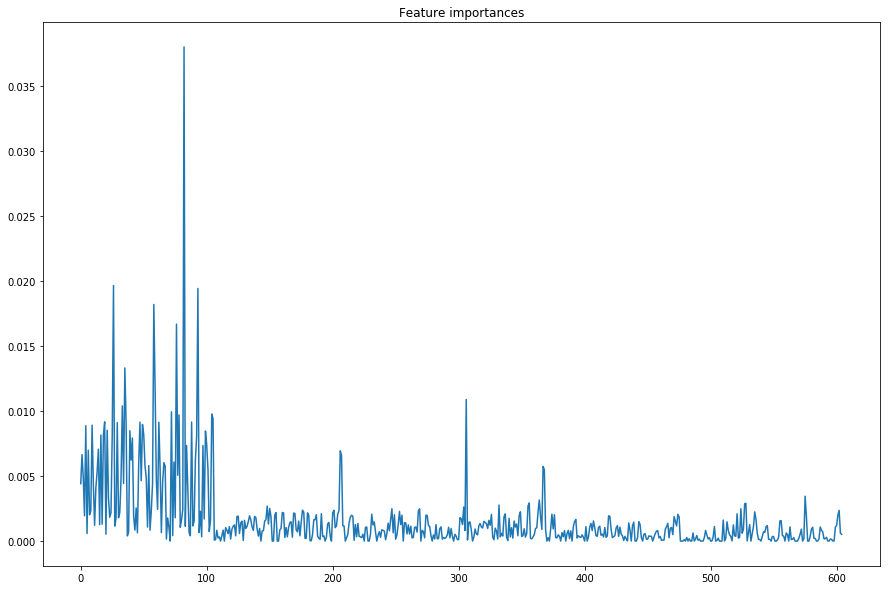

In [8]:
rffeatsUsed2 = rf_model2.feature_importances_
plt.figure(figsize=(15,10))
plt.title("Feature importances")
plt.plot(rffeatsUsed2)
plt.show()

* 0.00475 is the cut off point for the random forest model.